# Main Jupyter Notebook

## Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from dython import nominal
sb.set()

# Objective
It is observed that there are alot of materials (based on number of counts) for courses such as:
- Development 
- IT & Sofware 
- Teaching & Academics
- Business
- Personal development

However, it is notice that there are demands (based on number of subscribers) for low count material courses such as:
- Office Productivity
- Marketing
- Design
- Photography & Video
- Design

In this study, we would like to find out the likely if a new fees course in certain catergory will have more subscriber (= to more revenue made)


In [2]:
from importnb import imports
with imports("ipynb"):
    from contributions.amizzuddin.amizzuddin import (
        clean_up_dataset,
        remove_outliers,
        generate_numerical_eda_visualization
    )

CsvDataset = pd.read_csv("dataset/Course_info.csv")
ExtractDatasetOfInterest = pd.DataFrame(
    CsvDataset[[
        'price', 
        'num_subscribers', 
        'avg_rating', 
        'num_lectures',
        'content_length_min', 
        'category',
        'subcategory',
        'language',
        'instructor_name'
    ]]
)
categorical_feature_in_numerical = ['avg_rating']

In [3]:
# ExtractDatasetOfInterest.info()

In [4]:
# We are not interested with free course, 0 subscribers
CleanupDataset = clean_up_dataset(ExtractDatasetOfInterest)
CleanupDataset.info()

Duplicated instructors: 
Packt Publishing               1253
Bluelime Learning Solutions     420
Illumeo Learning                376
Bilal Semih Bozdemir            320
Infinite Skills                 318
                               ... 
Conrad Haida                      0
Szymon Szymański                  0
Conocimiento Oculto               0
Connor Miller                     0
Maria Leticia Croche              0
Name: instructor_name, Length: 72727, dtype: int64
price: <class 'str'> -> float64, 0
num_subscribers: <class 'str'> -> int64, 0
avg_rating: <class 'str'> -> float64, 0
num_lectures: <class 'str'> -> int64, 0
content_length_min: <class 'str'> -> int64, 0
category: <class 'str'> -> category, 0
subcategory: <class 'str'> -> category, 0
language: <class 'str'> -> category, 0
instructor_name: <class 'str'> -> category, 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178546 entries, 0 to 209729
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 

In [5]:
# RemovedOutlierDataset = remove_outliers(RemovedOutlierDataset, categorical_feature_in_numerical)
RemovedOutlierDataset = remove_outliers(CleanupDataset, [])
RemovedOutlierDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113124 entries, 0 to 113123
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   price               113124 non-null  float64 
 1   num_subscribers     113124 non-null  int64   
 2   avg_rating          113124 non-null  float64 
 3   num_lectures        113124 non-null  int64   
 4   content_length_min  113124 non-null  int64   
 5   category            113124 non-null  category
 6   subcategory         113124 non-null  category
 7   language            113124 non-null  category
 8   instructor_name     113122 non-null  category
dtypes: category(4), float64(2), int64(3)
memory usage: 7.8 MB


In [6]:
# Verify the claim made in objective, we will print the top 10 for most course material and most course subscribers
# knowing the top 10 course, should remove data that has no relation to study and do EDA from there
TopTenMostCourseMaterial = RemovedOutlierDataset['category'].value_counts()
print(f"Top 10 most material course: \n{TopTenMostCourseMaterial.head(20)}\n")


Top 10 most material course: 
IT & Software           15915
Business                14324
Development             13787
Teaching & Academics    13227
Personal Development    12037
Design                   8271
Lifestyle                7114
Health & Fitness         7060
Marketing                5985
Finance & Accounting     5883
Music                    3901
Office Productivity      3289
Photography & Video      2331
Name: category, dtype: int64



In [7]:
TopTenMostDemandCourse = RemovedOutlierDataset.groupby('category')['num_subscribers'].median().sort_values(ascending=False)
print(f"Top 10 most demand course: \n{TopTenMostDemandCourse.head(10)}")

Top 10 most demand course: 
category
Development             229.0
Office Productivity     177.0
Marketing               163.0
Design                  153.0
Photography & Video     149.0
IT & Software           144.0
Business                137.0
Music                   136.0
Finance & Accounting    115.0
Personal Development    101.0
Name: num_subscribers, dtype: float64


In [8]:
TopTenMostExpensiveCourse = RemovedOutlierDataset.groupby('category')['price'].median().sort_values(ascending=False)
print(f"Top 10 most expensive course: \n{TopTenMostExpensiveCourse.head(10)}")

Top 10 most expensive course: 
category
Business                49.99
Development             49.99
Finance & Accounting    49.99
Marketing               49.99
Design                  44.99
Music                   44.99
Personal Development    44.99
Photography & Video     44.99
Health & Fitness        39.99
Lifestyle               39.99
Name: price, dtype: float64


In [9]:
# Since can confirm that Business, Development, Design, marketing and 

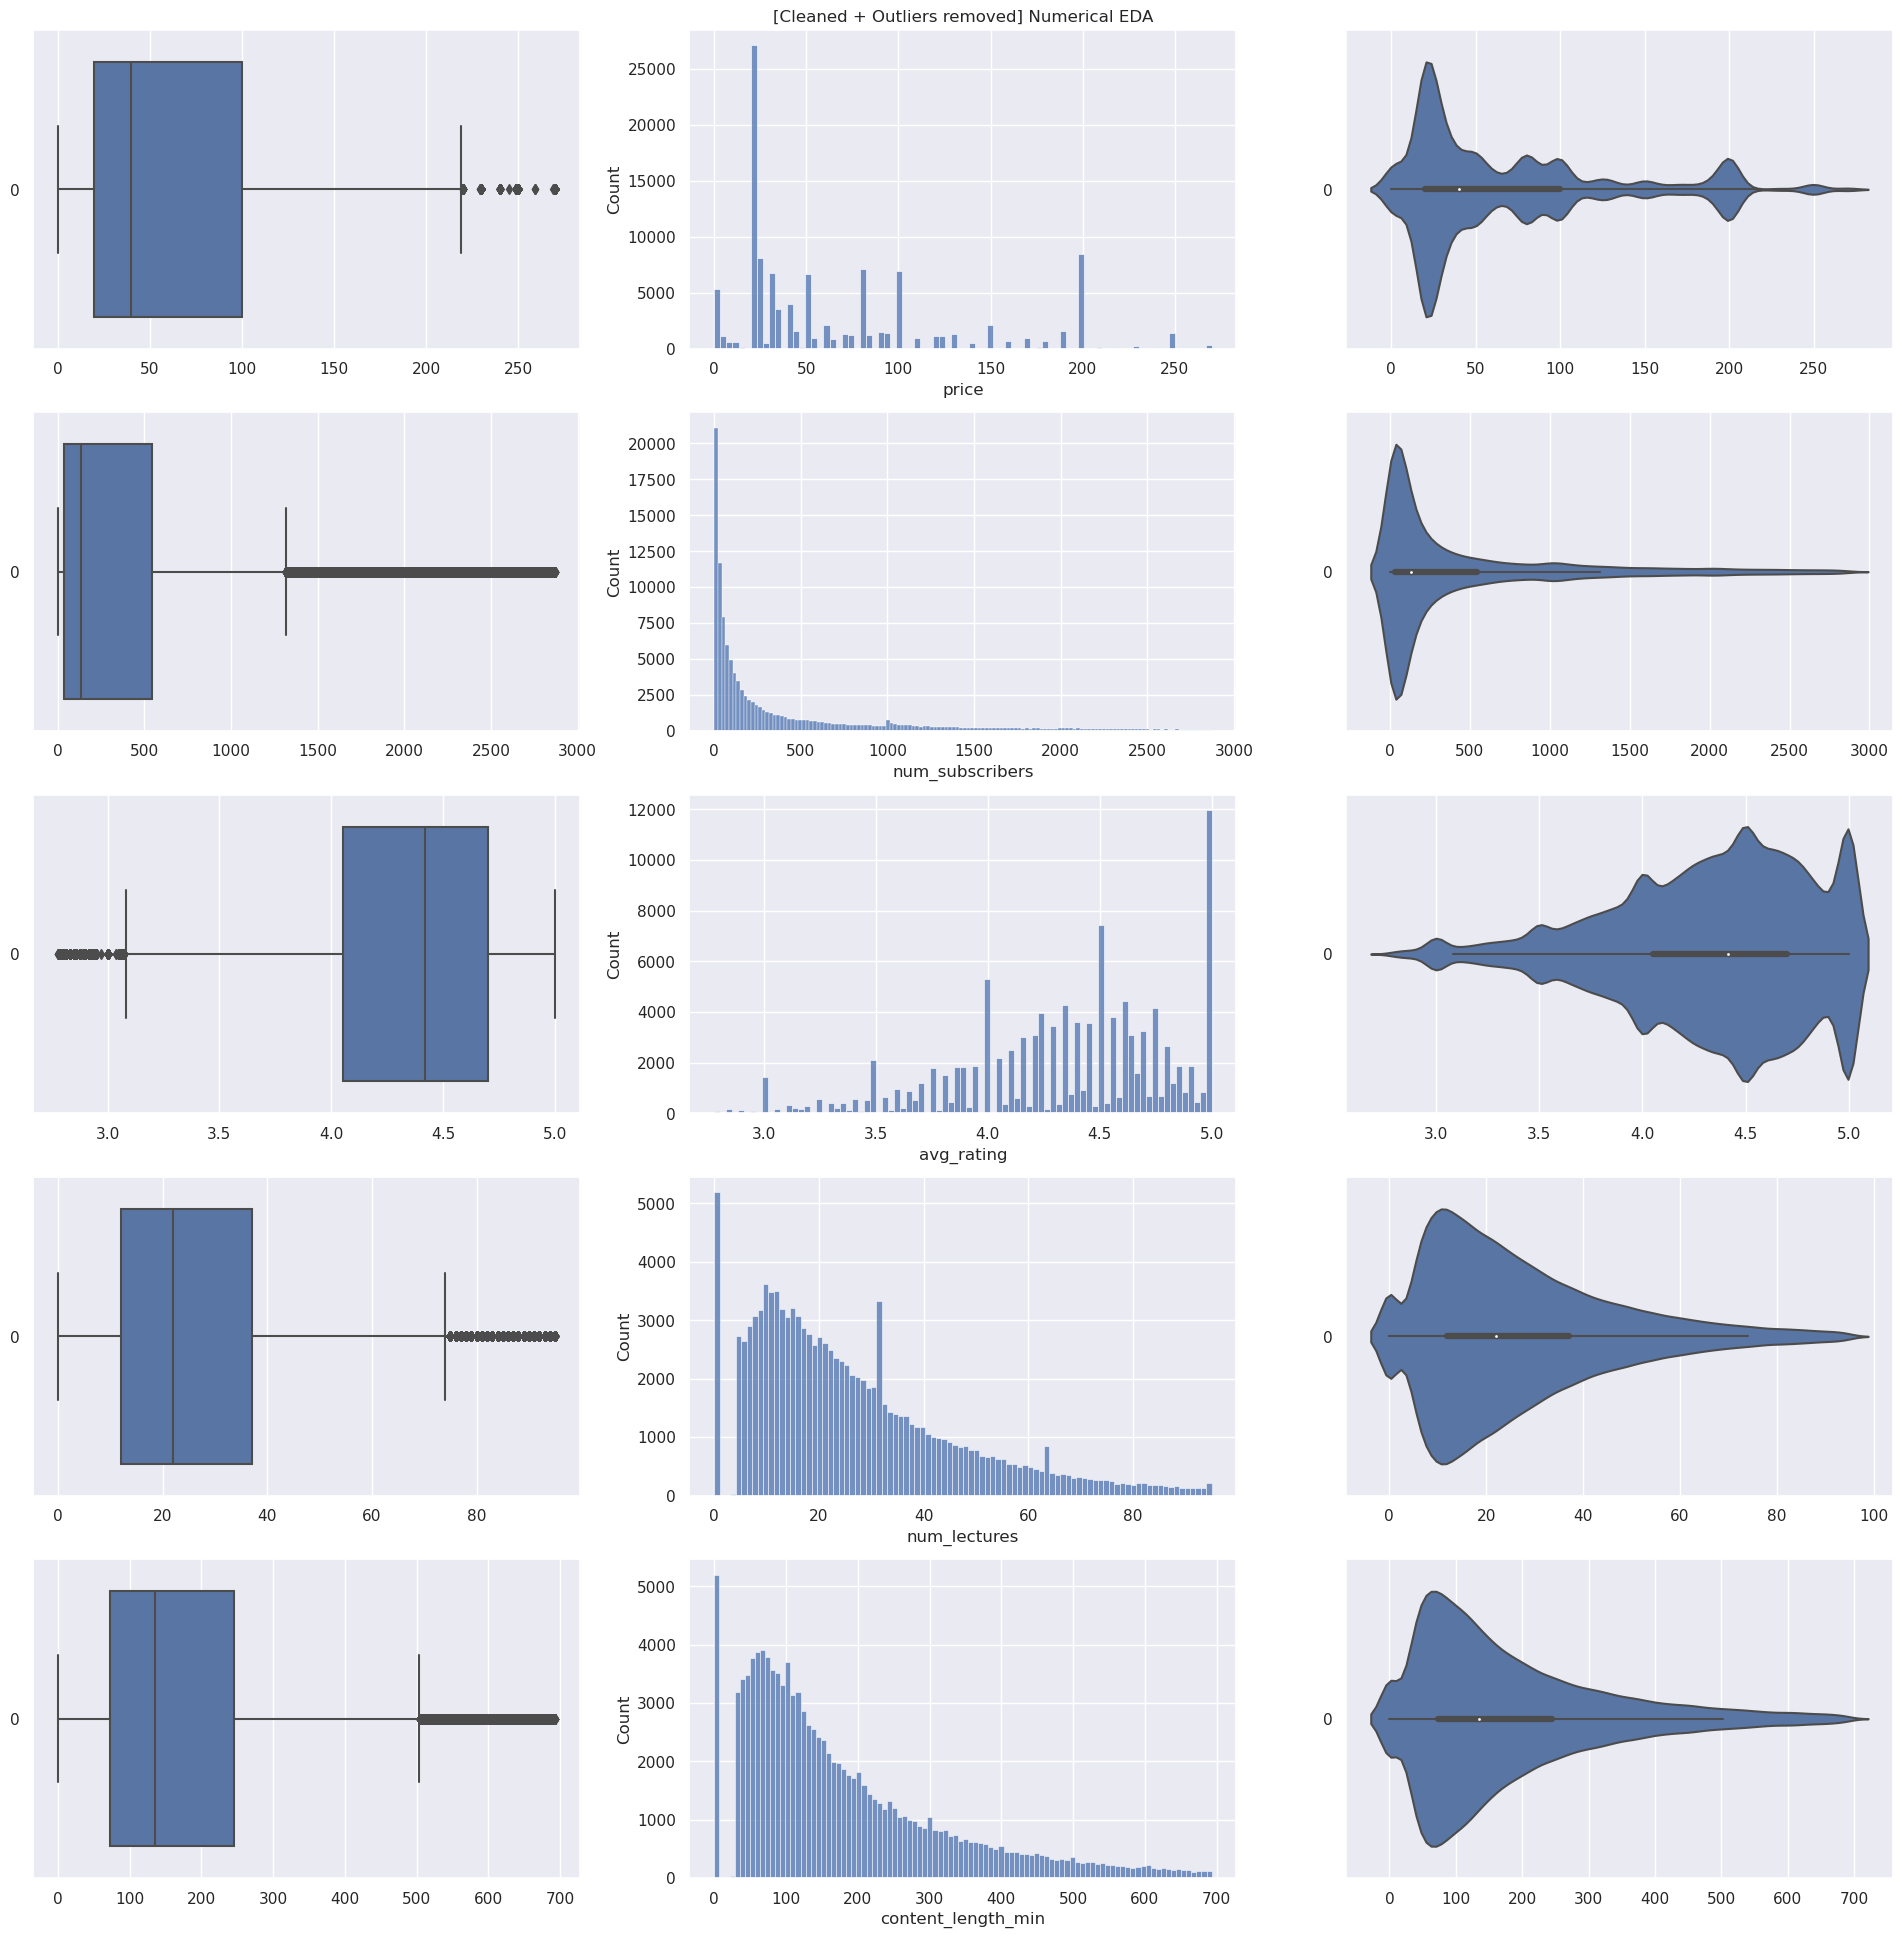

In [10]:
generate_numerical_eda_visualization(RemovedOutlierDataset, [], "[Cleaned + Outliers removed] Numerical EDA")

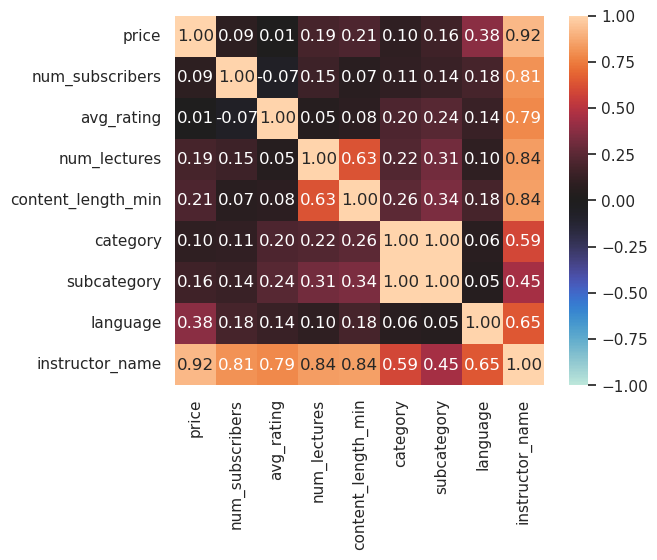

{'corr':                        price  num_subscribers  avg_rating  num_lectures  \
 price               1.000000         0.088824    0.005178      0.185112   
 num_subscribers     0.088824         1.000000   -0.065971      0.148999   
 avg_rating          0.005178        -0.065971    1.000000      0.048017   
 num_lectures        0.185112         0.148999    0.048017      1.000000   
 content_length_min  0.206215         0.068735    0.078332      0.629543   
 category            0.096879         0.106366    0.203134      0.223741   
 subcategory         0.162113         0.139400    0.235130      0.314875   
 language            0.376789         0.181795    0.137090      0.097782   
 instructor_name     0.920224         0.808214    0.787185      0.841969   
 
                     content_length_min  category  subcategory  language  \
 price                         0.206215  0.096879     0.162113  0.376789   
 num_subscribers               0.068735  0.106366     0.139400  0.181795   
 a

In [11]:
# generate catergorical vs numerical data
nominal.associations(RemovedOutlierDataset)

In [12]:
RemovedOutlierDataset.describe()

,price,num_subscribers,avg_rating,num_lectures,content_length_min
count,113124.000000,113124.000000,113124.000000,113124.00000,113124.000000
mean,67.778523,428.610869,4.343377,26.63113,178.622432
std,62.512971,621.480272,0.481299,19.69297,144.193783
min,0.100000,1.000000,2.777778,0.00000,0.000000
25%,19.990000,34.000000,4.050000,12.00000,73.000000
50%,39.990000,132.000000,4.416666,22.00000,135.000000
75%,99.900000,547.000000,4.700000,37.00000,245.000000
max,269.990000,2870.000000,5.000000,95.00000,693.000000
